<a href="https://colab.research.google.com/github/suchy1713/ML-Learning/blob/master/4_unsupervised_dl/autoencoder_theano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# -*- coding: utf-8 -*-
"""ann_theano_model.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1xwn7DYqyEDKrdQ9atMc6LRIAOWGyLKMV
"""

import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

def init_weights(M1, M2):
    return np.random.randn(M1, M2)/np.sqrt(M1)

class Autoencoder(object):
    def __init__(self, M, an_id):
        self.M = M
        self.id = an_id

    def fit(self, X, learning_rate=0.5, mu=0.99, epochs=1, batch_sz=100, show_fig=True):
        N, D = X.shape
        n_batches = N//batch_sz

        W0 = init_weights(D, self.M)
        self.W = theano.shared(W0, 'W_'+str(self.id))
        self.bh = theano.shared(np.zeros(self.M), 'bh_'+str(self.id))
        self.bo = theano.shared(np.zeros(D), 'bo_'+str(self.id))
        self.params = [self.W, self.bh, self.bo]
        self.forward_params = [self.W,  self.bh]

        self.dW = theano.shared(np.zeros((D, self.M)), 'dW_'+str(self.id))
        self.dbh = theano.shared(np.zeros(self.M), 'dbh_'+str(self.id))
        self.dbo = theano.shared(np.zeros(D), 'dbo_'+str(self.id))
        self.dparams = [self.dW, self.dbh, self.dbo]
        self.dforward_params = [self.dW,  self.dbh]

        X_in = T.matrix('X'+str(self.id))
        X_hat = self.forward_output(X_in)

        H = T.nnet.sigmoid(X_in.dot(self.W) + self.bh)
        self.hidden_op = theano.function(
            inputs=[X_in],
            outputs=H
        )

        cost = -(X_in*T.log(X_hat) + (1-X_in)*T.log(1-X_hat)).sum()/N
        cost_op = theano.function(
            inputs=[X_in],
            outputs=cost
        )

        updates = [
                   (p, p + mu*dp - learning_rate*T.grad(cost, p)) for p, dp in zip(self.params, self.dparams)
        ] + [
             (dp, mu*dp - learning_rate*T.grad(cost, p)) for p, dp in zip(self.params, self.dparams)
        ]

        train_op = theano.function(
            inputs=[X_in],
            updates=updates
        )

        self.predict = theano.function(
                    inputs=[X_in],
                    outputs=X_hat,
                )

        costs = []
        print('Training autoencoder ' + str(self.id))
        for i in range(epochs):
            print('Epoch ', i)
            X = shuffle(X)
            for j in range(n_batches):
                batch = X[j*batch_sz:(j*batch_sz + batch_sz)]
                train_op(batch)
                cost = cost_op(X)
                costs.append(cost)
            print('Cost: ', cost)

        if show_fig:
            plt.plot(costs)
            plt.show()

    def forward_hidden(self, X):
        print(type(self.W))
        Z = T.nnet.sigmoid(X.dot(self.W) + self.bh)
        return Z

    def forward_output(self, X):
        Z = self.forward_hidden(X)
        Y = T.nnet.sigmoid(Z.dot(self.W.T) + self.bo)
        return Y 

<class 'theano.tensor.sharedvar.TensorSharedVariable'>
Training autoencoder 0
Epoch  0
Cost:  168.17647898216046
Epoch  1
Cost:  142.1557060030876
Epoch  2
Cost:  129.6781045331869
Epoch  3
Cost:  124.09106783066541
Epoch  4
Cost:  119.73622213170931
Epoch  5
Cost:  116.73583361817323
Epoch  6
Cost:  113.74473259242231
Epoch  7
Cost:  110.97904559854368
Epoch  8
Cost:  108.58037774676824
Epoch  9
Cost:  106.27997980009916


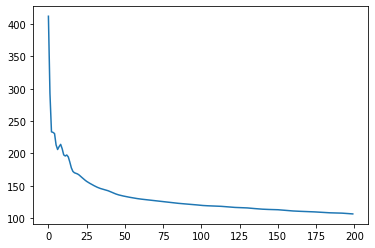

In [47]:
from keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train[:2000, :], x_test[:2000, :]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

ae = Autoencoder(200, 0)
ae.fit(x_train, epochs=10)

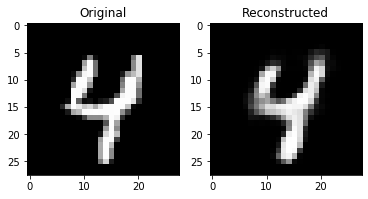

Generate another? (y/n)y


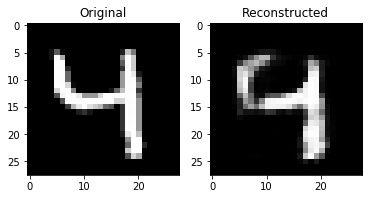

Generate another? (y/n)y


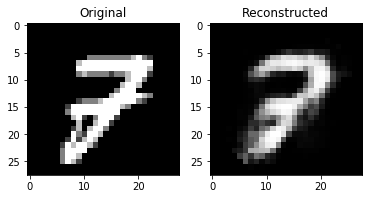

Generate another? (y/n)y


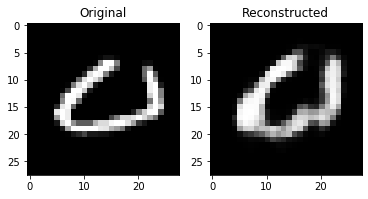

Generate another? (y/n)y


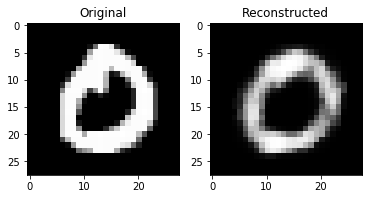

Generate another? (y/n)y


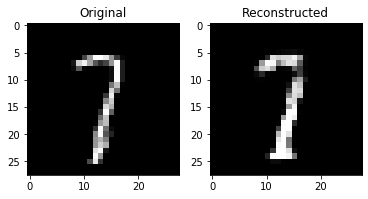

Generate another? (y/n)y


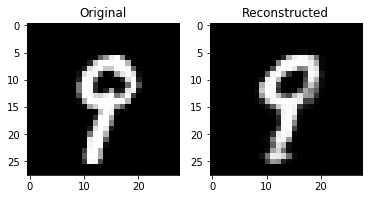

Generate another? (y/n)y


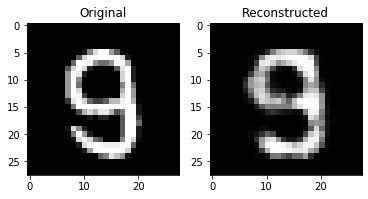

Generate another? (y/n)y


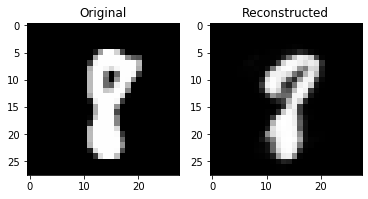

Generate another? (y/n)y


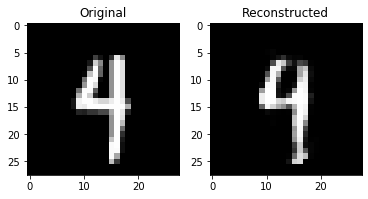

Generate another? (y/n)n


In [48]:
done = False
while not done:
    i = np.random.choice(len(x_test))
    x = x_test[i]
    y = ae.predict([x])
    plt.subplot(1, 2, 1)
    plt.imshow(x.reshape(28, 28), cmap='gray')
    plt.title('Original')
    
    plt.subplot(1, 2, 2)
    plt.imshow(y.reshape(28, 28), cmap='gray')
    plt.title('Reconstructed')

    plt.show()

    ans = input("Generate another? (y/n)")
    if ans and ans[0] in ('n' or 'N'):
        done = True